# This is a header

In [183]:
%matplotlib inline
import pandas as pd  ##going to use read csv
import numpy as np
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# Data Prep/Cleaning

In [2]:
tweets_df = pd.read_csv("SemEval2018-T3-train-taskA.txt", delimiter="\t")

In [3]:
tweets_df["Tweet text"]

0       Sweet United Nations video. Just in time for C...
1       @mrdahl87 We are rumored to have talked to Erv...
2       Hey there! Nice to see you Minnesota/ND Winter...
3                     3 episodes left I'm dying over here
4       I can't breathe! was chosen as the most notabl...
5       You're never too old for Footie Pajamas. http:...
6       Nothing makes me happier then getting on the h...
7       4:30 an opening my first beer now gonna be a l...
8       @Adam_Klug do you think you would support a gu...
9       @samcguigan544 You are not allowed to open tha...
10      Oh, thank GOD - our entire office email system...
11      But instead, I'm scrolling through Facebook, I...
12      @TargetZonePT :pouting_face: no he bloody isn'...
13      Cold or warmth both suffuse one's cheeks with ...
14      Just great when you're mobile bill arrives by ...
15      crushes are great until you realize they'll ne...
16      Buffalo sports media is smarter than all of us...
17      I gues

In [4]:
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

In [5]:
## to get a list of strings to feed into, put brackets after data frame name and get a list out

In [6]:
tokenizer.tokenize(tweets_df["Tweet text"])

TypeError: expected string or bytes-like object

In [8]:
# for tweet in tweets_df["Tweet text"]:
#     tokenizer.tokenize(tweet)  ##creates a list of tokens for each string (each tweet)

tokenize_tweets = [tokenizer.tokenize(tweet) for tweet in tweets_df["Tweet text"]]

In [9]:
tokenize_tweets[0]

['sweet',
 'united',
 'nations',
 'video',
 '.',
 'just',
 'in',
 'time',
 'for',
 'christmas',
 '.',
 '#imagine',
 '#noreligion',
 'http://t.co/fej2v3OUBR']

In [10]:
## term-document matrix : does this term occur in this document 
# The red fox. 
# The green frog.

# The red green frog fox
# [1, 1, 0, 0, 1]
# [1, 0 , 1, 1, 0]

## matrix is the width of every term that appears

In [11]:
lst_of_strings = []
for lst in tokenize_tweets:
    new_string = ""
    for word in lst:
        new_string += word + " "
    lst_of_strings.append(new_string)


In [12]:
lst_of_strings[:5]


['sweet united nations video . just in time for christmas . #imagine #noreligion http://t.co/fej2v3OUBR ',
 "we are rumored to have talked to erv's agent ... and the angels asked about ed escobar ... that's hardly nothing ;) ",
 'hey there ! nice to see you minnesota / nd winter weather ',
 "3 episodes left i'm dying over here ",
 "i can't breathe ! was chosen as the most notable quote of the year in an annual list released by a yale university librarian "]

In [114]:
# cv = CountVectorizer()
# doc_term = cv.fit_transform(lst_of_strings)
# doc_term = doc_term.todense()  ## takes our sparse matrix and makes it dense

# implementing n-grams
# cv = CountVectorizer(ngram_range=(1,2)) ## counting everyword and pair of words
# doc_term = cv.fit_transform(lst_of_strings)
# doc_term = doc_term.todense()  ## takes our sparse matrix and makes it dense

##now trying pairs of words
# cv = CountVectorizer(ngram_range=(2,2)) 
# doc_term = cv.fit_transform(lst_of_strings)
# doc_term = doc_term.todense()  ## this result was worse


#now trying single words and 3-grams 
cv = CountVectorizer(ngram_range=(1,3)) 
doc_term = cv.fit_transform(lst_of_strings)
doc_term = doc_term.todense()  ## this result was better, spiked up faster at the beginning

# ##now trying single words and 5-grams 
# cv = CountVectorizer(ngram_range=(1,5)) 
# doc_term = cv.fit_transform(lst_of_strings)
# doc_term = doc_term.todense()  ## maybe too far

##we just did a "grid search" -- trying different things to see what works best

# Model Selection

In [115]:
## vocab = 10770 words. 

In [116]:
from sklearn.naive_bayes import MultinomialNB    ##these are model objects
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 


## Jared prefers LR over NB because NB has been used for very specific things. 
#For general classification, LR works better. 
# "No Free Lunch Theorem" states that there is not model that's the best model for everything
## not every sklearn model is able to take sparse matrices in 


from sklearn.model_selection import train_test_split
## library for model selection to get train vs test set
## it wants my x matrix and y vector 

## will return 4 arrays: labels for training set and the test set. 75% training, 25% test.
#(x's are terms, y's are labels)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(doc_term, tweets_df["Label"]) 
## on all of the data

In [154]:
len(doc_term)

3817

In [ ]:
nb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()  

## RF is an ensemble of dumb classifiers, 
#makes a bunch of decision trees that are trained on some random columns.
# grab random columns, make a decision tree, and keep repeating. then do a decision tree with them in the end. 

In [152]:
# lr = LogisticRegression(penalty='l1') --> didn't help
# lr = LogisticRegression(C=.05) -> not as bad as l1 on its own)
# lr = LogisticRegression(penalty="l1", C=.05) --> the worst ever

#should continue to read about cross-validation 
# (re: splitting stratetgies, what's the best way to split your data. 
#you have a bunch of true and false labeled data, 
#is it important you maintain the same level of true/false in each split?)
#jared likes shuffle_split

##regularization (penalization) sets up a wall to avoid overfitting. 
# it's still possible to overfit, with strong evidence

from sklearn.model_selection import GridSearchCV

parameters = {'penalty':('l1', 'l2'), 'C':[1, 10]}
clf = GridSearchCV(lr, parameters, cv=5, verbose=2)
clf.fit(doc_term, tweets_df["Label"])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   4.9s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] .................................. C=1, penalty=l1, total=   4.3s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   4.1s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   4.2s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   4.1s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   3.9s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   3.8s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   3.8s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [153]:
clf.best_params_
pd.DataFrame(clf.cv_results_)

# training score is the results of putting training data into fitted model and seeing what prediction is
# tells you how well you predict data you've already seen 
# test score / training score discrepancy means overfitted! 
# an overfitted model could be the best model, but still have to mention it's overfitting
## want the test and training numbers to be closer to gether. restricting depth is one method of doing so with RF

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.886750,0.427994,0.627980,0.852568,1,l1,"{'C': 1, 'penalty': 'l1'}",3,0.662745,0.854849,...,0.606815,0.853307,0.647444,0.853962,0.597641,0.852980,0.293852,0.011685,0.024353,0.002497
1,3.436145,0.395159,0.642389,0.999542,1,l2,"{'C': 1, 'penalty': 'l2'}",1,0.669281,0.999672,...,0.626474,1.000000,0.672346,0.999018,0.605505,0.999673,0.024790,0.010144,0.025501,0.000334
2,3.657279,0.421912,0.619073,0.999803,10,l1,"{'C': 10, 'penalty': 'l1'}",4,0.622222,0.999672,...,0.604194,1.000000,0.643512,1.000000,0.605505,0.999345,0.106263,0.011712,0.014233,0.000262
3,3.556490,0.405126,0.633482,1.000000,10,l2,"{'C': 10, 'penalty': 'l2'}",2,0.661438,1.000000,...,0.618611,1.000000,0.661861,1.000000,0.604194,1.000000,0.080161,0.015357,0.023734,0.000000


In [ ]:
### best_params were: C= 1 and Penalty = l2
# the default cv was 3, we increased it to 5. 
#LR is a simple model, RF has more params to change grid search on

In [148]:

## running grid search on RF
parameters = {'n_estimators':[32, 64, 128], 'max_depth':[6, 8, 10]} 
#increasing estimators increases training time, depth doesn't
clf = GridSearchCV(rf, parameters, cv=2, verbose=2) ##made cv =2 to for time
clf.fit(doc_term, tweets_df["Label"])

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] max_depth=6, n_estimators=32 ....................................
[CV] ..................... max_depth=6, n_estimators=32, total=   6.1s
[CV] max_depth=6, n_estimators=32 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ..................... max_depth=6, n_estimators=32, total=   4.6s
[CV] max_depth=6, n_estimators=64 ....................................
[CV] ..................... max_depth=6, n_estimators=64, total=   6.1s
[CV] max_depth=6, n_estimators=64 ....................................
[CV] ..................... max_depth=6, n_estimators=64, total=   5.9s
[CV] max_depth=6, n_estimators=128 ...................................
[CV] .................... max_depth=6, n_estimators=128, total=   8.9s
[CV] max_depth=6, n_estimators=128 ...................................
[CV] .................... max_depth=6, n_estimators=128, total=   8.8s
[CV] max_depth=8, n_estimators=32 ....................................
[CV] ..................... max_depth=8, n_estimators=32, total=   5.0s
[CV] max_depth=8, n_estimators=32 ....................................
[CV] ..................... max_depth=8, n_estimators=32, total=   4.9s
[CV] max_depth=8, n_estimators=64 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.5min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [32, 64, 128], 'max_depth': [6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [149]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 128}

In [150]:
pd.DataFrame(clf.cv_results_)

## the best score we could get out the rf was .61.

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.631787,0.718489,0.582133,0.668063,6,32,"{'max_depth': 6, 'n_estimators': 32}",9,0.567313,0.663522,0.596960,0.672603,0.717006,0.020472,0.014824,0.004541
1,5.343557,0.653107,0.586848,0.714432,6,64,"{'max_depth': 6, 'n_estimators': 64}",7,0.597695,0.700734,0.575996,0.728130,0.026863,0.028293,0.010850,0.013698
2,8.213514,0.631247,0.600734,0.770760,6,128,"{'max_depth': 6, 'n_estimators': 128}",5,0.607124,0.763103,0.594340,0.778418,0.047577,0.021370,0.006392,0.007658
3,4.265015,0.665504,0.591302,0.690596,8,32,"{'max_depth': 8, 'n_estimators': 32}",6,0.586171,0.694444,0.596436,0.686747,0.024258,0.051562,0.005133,0.003849
4,6.325753,0.686074,0.601258,0.731990,8,64,"{'max_depth': 8, 'n_estimators': 64}",4,0.599267,0.738470,0.603249,0.725511,0.164725,0.054358,0.001991,0.006479
5,10.542145,0.664952,0.614095,0.788840,8,128,"{'max_depth': 8, 'n_estimators': 128}",2,0.618649,0.790356,0.609539,0.787323,0.012099,0.057341,0.004555,0.001517
6,4.734359,0.657954,0.582657,0.717842,10,32,"{'max_depth': 10, 'n_estimators': 32}",8,0.588790,0.720126,0.576520,0.715558,0.040217,0.004905,0.006135,0.002284
7,6.961533,0.631927,0.605711,0.746393,10,64,"{'max_depth': 10, 'n_estimators': 64}",3,0.598219,0.729560,0.613208,0.763227,0.046703,0.027167,0.007494,0.016834
8,11.830532,0.670731,0.614619,0.800630,10,128,"{'max_depth': 10, 'n_estimators': 128}",1,0.612886,0.805556,0.616352,0.795705,0.098778,0.056866,0.001733,0.004925


In [131]:
## this is a process of model selection 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, doc_term, tweets_df["Label"], cv=5)
np.mean(scores), np.std(scores) 

(0.6201221528366698, 0.02569524963547301)

In [139]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, doc_term, tweets_df["Label"], cv=5)
np.mean(scores), np.std(scores) ##LR is working the best with the data we currently have! 

#should continue to read about cross-validation 
# (re: splitting stratetgies, what's the best way to split your data. 
#you have a bunch of true and false labeled data, 
#is it important you maintain the same level of true/false in each split?)
#jared likes shuffle_split


##regularization (penalization) sets up a wall to avoid overfitting. 
# it's still possible to overfit, with strong evidence

(0.593391754255219, 0.020379661558376658)

In [130]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, doc_term, tweets_df["Label"], cv=5)
np.mean(scores), np.std(scores) 

(0.5973222316449516, 0.021815359336591584)

In [119]:
nb.fit(Xtrain, Ytrain)
lr.fit(Xtrain, Ytrain)
rf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
## each classification model has a predict prob. y_hat = predicted probabiliy
# makes a prediction for every tweet not in the training set
yhat_nb = nb.predict_proba(Xtest)
yhat_lr = lr.predict_proba(Xtest)
yhat_rf = rf.predict_proba(Xtest)

In [121]:
## two competing metrics
# specificity (how good you are at false negatives) and sensitivity (how well can identify false positives)
# ROC measures how well actually distinguishing between these two classes 

from sklearn.metrics import roc_auc_score as roc  
## takes a list of p's and a list of labels and gives me a number out

In [122]:
yhat_nb
## p 0 (non-ironic) is the first column, 1 (ironic) is second column

array([[0.99038553, 0.00961447],
       [0.01380784, 0.98619216],
       [0.02391917, 0.97608083],
       ...,
       [0.04041444, 0.95958556],
       [0.00204746, 0.99795254],
       [0.50667901, 0.49332099]])

In [123]:
## roc wants the true labels, and then p that it's = to 1, by slicing second column to the array

roc(Ytest, yhat_nb[:,1])   ## : means give me every single row. the 1 means "i want the 1th column"

# worst ROC score = .5, best = 1.0
# .5 is the worst because it's a 50/50 chance
# ROC score is a probability. 
# means if you give me an ironic and a non-ironic tweet, 66% of the time i can distinguish them

0.6792236842105265

In [124]:
roc(Ytest, yhat_lr[:,1])   ###will always need to report the curve with it

0.6975043859649123

In [125]:
## to increase the score, need better features, not better model 

In [126]:
roc(Ytest, yhat_rf[:,1])

0.6465021929824561

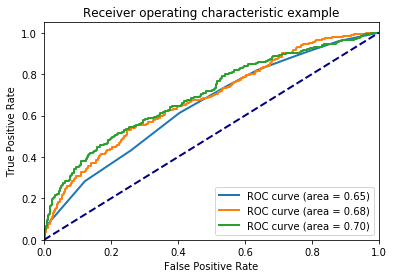

In [155]:
##fpr and tpr are like x and y values
## this figure shows up in every machine learning classifier paper
# this curve moves up if you identify true pos. (correctly), 
# moves to the right if you identify something wrong
# worst score = .5 (baseline, 50/50), best score is 1

##document-term matrix is not capturing all features of irony well

from sklearn.metrics import roc_curve

fpr_randomforest, tpr_randomforest, _ = roc_curve(Ytest, yhat_rf[:,1]) 
fpr_naivebayes, tpr_naivebayes, _ = roc_curve(Ytest, yhat_nb[:,1]) 
fpr_logisticregression, tpr_logisticregression, _ = roc_curve(Ytest, yhat_lr[:,1]) 

plt.figure()
plt.plot(fpr_randomforest, tpr_randomforest, lw=2,
         label='ROC curve (area = %0.2f)' % roc(Ytest, yhat_rf[:,1]))
plt.plot(fpr_naivebayes, tpr_naivebayes, lw=2,
         label='ROC curve (area = %0.2f)' % roc(Ytest, yhat_nb[:,1]))
plt.plot(fpr_logisticregression, tpr_logisticregression, lw=2,
         label='ROC curve (area = %0.2f)' % roc(Ytest, yhat_lr[:,1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig("./roc_curve_baseline.png")

In [111]:
## with n-grams will make a new column for every n-gram vs every word
## get my baseline and then get them to work better. 
## then compare them to the state of the art lstm. 

In [83]:
## now going to improve baselines with n-grams

# Model Introspection/Interpretation

In [ ]:
## how to get feature importances out of these models?
## which words are most important in determining if something is ironic or not?

##train a new lr, get weights out, turn from weights to words that are most important

In [184]:
## need to implement stopwords

# cv = CountVectorizer(ngram_range=(1,3), stop_words="english") 
# doc_term = cv.fit_transform(lst_of_strings)
# doc_term = doc_term.todense() 

## do tf-idf vectorizer
cv = TfidfVectorizer(ngram_range=(1,3), stop_words="english") 
doc_term = cv.fit_transform(lst_of_strings)
doc_term = doc_term.todense() 

/Users/Jordan_Earnest/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [185]:
lr = LogisticRegression()
lr.fit(doc_term, tweets_df["Label"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
lr.coef_
## getting the coefficients of the features
## if a coef is large in magnitude, it's important! 
## that feature has a lot of weight in determinign irony!

## each number in the array corresponds to importance of a single word 
## (or n-gram, depending. in this case ngram = 1,3)

array([[-0.00340052, -0.09638679, -0.09638679, ..., -0.07686238,
        -0.07686238, -0.07686238]])

In [187]:
## get the index of highest weights 
# np.argsort(lr.coef_)
#this would give us the indices from  smallest to largest 

#however, we want the magnitude (a large negative coef is also import)

least_ironic_lst = np.argsort(lr.coef_)[0][:20] 
most_ironic_lst = np.argsort(lr.coef_)[0][-20:] 

In [188]:
for i in most_ironic_lst:
    print(cv.get_feature_names()[i])

glad
hours
funny
really
waking
working
monday
just love
day
wait
work
wow
unamused_face
nice
oh
yay
thanks
fun
great
love


In [189]:
for i in least_ironic_lst:
    print(cv.get_feature_names()[i])

http
follow
tonight
check
https
think
2015
understand
seen
dont
literally
long
need
face_throwing_a_kiss
rt
change
idea
did
girl
playing


In [191]:
## could sacrifice a lower roc store for a different ngram
## do tf-idf vectorizer

## in presentation add tweets with most ironic words in them! (just love)

In [ ]:
## next implement LSTM sentiment analysis